In [1]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

from model_opt import Perm
from algo_GD import SGD
import noise

b = 0

In [8]:
w_init = np.array([1,1])
noise_value = np.zeros(2)
var = 50 # iqr 70~80
batchsize = 100
_t_max = 100
noise_data = noise.Gauss(mean=0, sigma=var, dim=2, n=batchsize * _t_max).generate()
f = Perm(noise_value=noise_value)
algo = SGD(w_init=w_init, t_max=_t_max, a=0.003)
for i in algo:
    f = Perm(noise_value=noise_value)
    print(f.g_opt(algo.w))
    algo.update(model=f)

x = np.arange(-2, 2.1, 0.1)
y = np.arange(-2, 2.1, 0.1)
X, Y = np.meshgrid(x, y)
Z = []
for i,j in zip(X,Y):
    for k,l in zip(i,j):
        Z.append(f.f_opt([k,l]))
Z = np.array(Z).reshape(X.shape)

[ 0.       16.016004]
[ 0.         13.62415588]
[ 0.         11.75616199]
[ 0.         10.26208168]
[0.         9.04360362]
[0.         8.03369375]
[0.         7.18514481]
[0.         6.46379842]
[0.         5.84436005]
[0.         5.30772116]
[0.         4.83919259]
[0.         4.42730768]
[0.         4.06299241]
[0.         3.73897801]
[0.         3.44937752]
[0.         3.18937545]
[0.         2.95499703]
[0.         2.74293415]
[0.         2.55041263]
[0.         2.37508971]
[0.         2.21497418]
[0.         2.06836345]
[0.         1.93379359]
[0.         1.80999936]
[0.        1.6958819]
[0.         1.59048252]
[0.         1.49296127]
[0.         1.40257927]
[0.         1.31868409]
[0.         1.24069759]
[0.         1.16810573]
[0.         1.10045003]
[0.         1.03732029]
[0.         0.97834852]
[0.         0.92320363]
[0.         0.87158703]
[0.         0.82322874]
[0.         0.77788408]
[0.         0.73533084]
[0.         0.69536674]
[0.         0.65780733]
[0.         0.

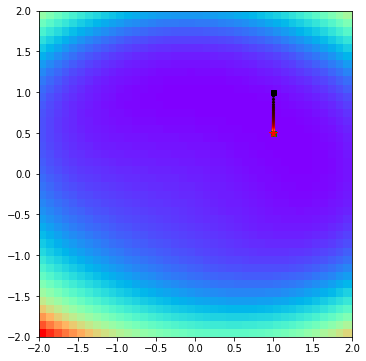

In [9]:
w_store = np.array(algo.wstore)
fig, axes = plt.subplots(1,1, figsize=(6,6))
axes.pcolor(X, Y, Z,cmap=plt.cm.rainbow)
# wの軌跡
axes.plot(w_store.T[0],w_store.T[1],c = "k",alpha=0.2,linewidth = 1)
c = np.linspace(0, _t_max, len(w_store))
axes.scatter(w_store.T[0],w_store.T[1],c=c,cmap = plt.cm.hot ,linewidths=0.01,alpha=1,s=10)

# 始点(黄色)、終点（緑）、真値（赤）
axes.plot(*w_store[0], 'ks', markersize=5,label="start")
axes.plot(*w_store[-1], 'gs', markersize=5,label="finish")
axes.plot(*f.w_star, 'r*', markersize=8,label="true value")


#余白の調整
plt.subplots_adjust(right=0.85)
plt.subplots_adjust(wspace=0.1)

plt.show()

In [7]:
f.g_opt([-1,-1])

array([ -4.008004, -24.024006])